# Multilabelling sur le dataset cleané

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from ast import literal_eval

In [2]:
import pickle

### Visualisation de la database

In [3]:
df = pd.read_csv('dataset_clean.csv',converters={"list_title": literal_eval,
                               "list_body": literal_eval,
                               "Tags_list": literal_eval})
df.head()

,Unnamed: 0,Id,Tags_list,list_title,list_body
0,0,4,[c#],"[convert, decimal, double, c]","[trackbar, form, opacity, decimal, trans, trac..."
1,1,6,"[html, css]","[width, collapse, percentage, width, child, el...","[absolutely, position, div, contain, several, ..."
2,3,9,"[c#, .net]","[calculate, someone, age, base, datetime, type...","[give, datetime, represent, person, birthday, ..."
3,4,11,[c#],"[calculate, relative, time, c]","[give, specific, datetime, value, display, rel..."
4,6,13,[html],"[determine, user, timezone]","[standard, web, server, able, determine, user,..."


# Construction du bag of words

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

X = df['list_title'] + df['list_body']
Y = df["Tags_list"]

# Initialize the "CountVectorizer" TFIDF for Full_doc
vectorizer = TfidfVectorizer(analyzer="word",
                             max_df=.6,
                             min_df=0.005,
                             tokenizer=None,
                             preprocessor=' '.join,
                             stop_words=None,
                             lowercase=False)

vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

print("Shape of X for Full_doc: {}".format(X_tfidf.shape))

# Multilabel binarizer for targets


multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(Y)
y_binarized = multilabel_binarizer.transform(Y)

print("Shape of y: {}".format(y_binarized.shape))

Shape of X for Full_doc: (7696, 1175)
Shape of y: (7696, 50)


### Split du dataset 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_binarized,
                                                    test_size=0.2, random_state=8)

In [6]:
# import smart_open
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(X)

# Create Corpus
texts = X

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# ML non supervisé, utilisation du modèle LDA

In [7]:
from pprint import pprint
import gensim

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"type" + 0.009*"object" + 0.008*"c" + 0.007*"data" + 0.006*"use" + '
  '0.006*"project" + 0.006*"string" + 0.006*"number" + 0.005*"store" + '
  '0.005*"version"'),
 (1,
  '0.016*"use" + 0.014*"application" + 0.013*"string" + 0.011*"c" + '
  '0.008*"object" + 0.007*"net" + 0.006*"public" + 0.006*"class" + '
  '0.006*"value" + 0.005*"list"'),
 (2,
  '0.015*"use" + 0.007*"c" + 0.007*"class" + 0.006*"aspnet" + 0.006*"window" + '
  '0.006*"control" + 0.006*"new" + 0.005*"problem" + 0.004*"user" + '
  '0.004*"time"'),
 (3,
  '0.009*"user" + 0.008*"use" + 0.007*"web" + 0.007*"application" + '
  '0.007*"name" + 0.006*"server" + 0.006*"c" + 0.006*"error" + 0.005*"net" + '
  '0.005*"file"'),
 (4,
  '0.014*"use" + 0.011*"window" + 0.010*"c" + 0.005*"call" + 0.005*"new" + '
  '0.004*"work" + 0.004*"xml" + 0.004*"error" + 0.004*"try" + 0.004*"item"'),
 (5,
  '0.010*"use" + 0.008*"data" + 0.007*"window" + 0.005*"c" + 0.005*"server" + '
  '0.005*"javascript" + 0.005*"start" + 0.005*"wel

### Visualisation du modèle LDA

In [8]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models as gensimvis
from IPython.core.display import display, HTML
pyLDAvis.enable_notebook()


%matplotlib inline

display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

gensimvis.prepare(lda_model, corpus, id2word)

C:\Users\Lucas\Desktop\projet5_v3\venv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.004412 -0.007145       1        1  8.876171
14     0.039642  0.000800       2        1  7.246667
15     0.003774 -0.023976       3        1  7.150622
8      0.011419 -0.000621       4        1  7.007907
10     0.009437 -0.024133       5        1  5.795782
3      0.011277  0.010513       6        1  5.661564
2     -0.008183 -0.024379       7        1  5.364289
0      0.002978 -0.006090       8        1  5.176139
17     0.016512  0.000262       9        1  5.005426
19     0.010533  0.037750      10        1  4.925976
11    -0.004294 -0.001771      11        1  4.586441
18    -0.024910  0.025656      12        1  4.475545
7      0.018790  0.048457      13        1  4.326482
4     -0.039689  0.016734      14        1  3.806755
9     -0.013434 -0.019547      15        1  3.738363
5     -0.022662  0.010456      16        1  3.696832
12    -0.050718 -0.013665      17        1  3.661965
6      0.037487 -0.041315      18        1  3.302683
16     0.021256  0.026434      19        1  3.294771
13    -0.014802 -0.014421      20        1  2.899620, topic_info=            Term         Freq        Total Category  logprob  loglift
214         test  1442.000000  1442.000000  Default  30.0000  30.0000
361        class  1900.000000  1900.000000  Default  29.0000  29.0000
647       window  1574.000000  1574.000000  Default  28.0000  28.0000
77        server  2196.000000  2196.000000  Default  27.0000  27.0000
79        string  1619.000000  1619.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
0    application    37.544565  2102.733001  Topic20  -5.7550  -0.4849
79        string    34.221378  1619.719161  Topic20  -5.8477  -0.3166
69          time    32.887826  1259.242845  Topic20  -5.8874  -0.1046
309         best    32.723344  1282.157276  Topic20  -5.8925  -0.1276
343          sql    31.653222  1499.394861  Topic20  -5.9257  -0.3174

[1691 rows x 6 columns], token_table=       Topic      Freq               Term
term                                     
11482      1  0.053231                 __
11482      2  0.053231                 __
11482      4  0.053231                 __
11482     10  0.106462                 __
11482     12  0.106462                 __
...      ...       ...                ...
22296     20  0.765291  yetanotherdataset
29343      9  0.749621             ymodem
12906      6  0.863496                zfs
12598      3  0.211111                  â
12598      5  0.633333                  â

[6563 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 15, 16, 9, 11, 4, 3, 1, 18, 20, 12, 19, 8, 5, 10, 6, 13, 7, 17, 14])

# Utilisation d'algorithme de ML supervisés

### Knn Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

#X_train, X_test, y_train, y_test

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

### OneVsRest classifier with LinearSVC

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

OvR_SVC = OneVsRestClassifier(LinearSVC())
OvR_SVC.fit(X_train,y_train)
OvR_SVC_pred = OvR_SVC.predict(X_test)

### RandomForest Classifier 

In [11]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_pred = RFC.predict(X_test)

### Comparaison des modèles ML supervisés

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def results(pred,true):
    dico = {'accuracy' : accuracy_score(pred,true),
            'precision_score' : precision_score(pred,true,average = 'macro'),
            'recall_score' : recall_score(pred,true,average = 'macro'),
            'f1_score' : f1_score(pred,true,average = 'macro')}
    return dico



res_knn = results(knn_pred,y_test)
res_ovr_svc = results(OvR_SVC_pred,y_test)
res_rfc = results(RFC_pred,y_test)



print('KNN',res_knn)
print('OVR w SVC',res_ovr_svc)
print('Random Forest',res_rfc)

KNN {'accuracy': 0.15714285714285714, 'precision_score': 0.24037588960534154, 'recall_score': 0.633807216226138, 'f1_score': 0.33201554987366855}
OVR w SVC {'accuracy': 0.2733766233766234, 'precision_score': 0.41826366506893736, 'recall_score': 0.7578604100710904, 'f1_score': 0.5132472344060175}
Random Forest {'accuracy': 0.2603896103896104, 'precision_score': 0.27083472432701794, 'recall_score': 0.6763401633403447, 'f1_score': 0.36028803522083686}


C:\Users\Lucas\Desktop\projet5_v3\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucas\Desktop\projet5_v3\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


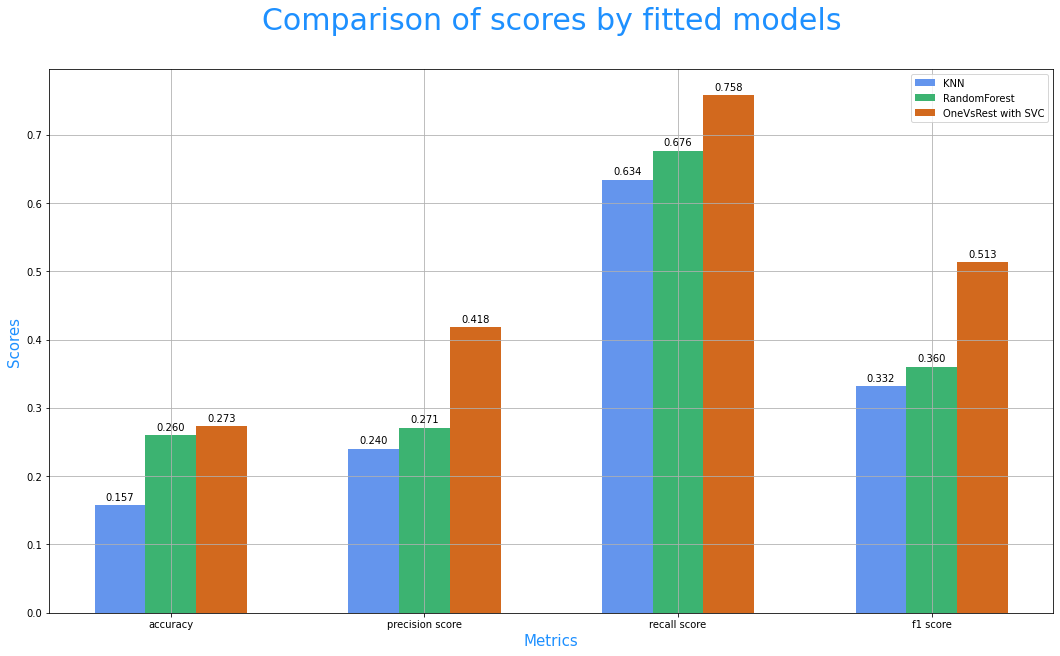

In [13]:
fig = plt.figure(figsize=(18,10))
w1 = 0.2
w2 = 0.2
ax1 = fig.add_subplot(111)

labels = ['accuracy', 'precision score', 'recall score', 'f1 score']
x = np.arange(len(labels)) 


knn_plot = ax1.bar(x-w1, list(res_knn.values()), width = 0.2,align='center',color = 'cornflowerblue',label="KNN")
RFC_plot = ax1.bar(x, list(res_rfc.values()), width = 0.2,align='center',color = 'mediumseagreen',label="RandomForest")
ovrsvc_plot = ax1.bar(x+w1, list(res_ovr_svc.values()), width = 0.2,align='center',color = 'chocolate',label="OneVsRest with SVC")

ax1.set_ylabel('Scores',color="dodgerblue",fontdict={'fontsize': 15})
ax1.set_xlabel('Metrics',color="dodgerblue",fontdict={'fontsize': 15})
ax1.set_title('Comparison of scores by fitted models\n',
              color="dodgerblue", 
              fontdict={'fontsize': 30})

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
# ax1.set_xticks(list(res_knn.keys()))


# lines, labels = ax1.get_legend_handles_labels()

ax1.bar_label(knn_plot, padding=3,fmt='%.3f')
ax1.bar_label(RFC_plot, padding=3,fmt='%.3f')
ax1.bar_label(ovrsvc_plot, padding=3,fmt='%.3f')
# plt.xticks(range(len(res_knn)), list(res_knn.keys()))

plt.grid()
plt.show()

# Méthode supervisée, utilisation d'un réseau de neurone

Création d'un réseau de neurone profond avec 3 layers denses et des dropout layers entre chaque couche afin d'éviter l'overfitting

In [14]:
import tensorflow as tf

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session
from keras import backend as K

In [15]:
#Build functions to evaluate Keras NN model


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [16]:
def build_nn(input_dim, hidden_neurons, output_dim):
    """
    Construct a Keras model which will be used to 
    fit/predict in SKlearn pipeline.
    """

    # Create RNN
    
    model = Sequential()
    model.add(layers.Dense(hidden_neurons,
                           input_dim=input_dim,
                           activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(hidden_neurons,
                           input_dim=input_dim,
                           activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(output_dim,
                           activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', recall_m, precision_m, f1_m,])#, recall_score, precision_score, f1_score])
    model.summary()
    
    return model

In [17]:
clear_session()

model_params = {
    'input_dim': X_train.shape[1],
    'hidden_neurons': 150,
    'output_dim': y_train.shape[1]}

keras_model = build_nn(**model_params)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               176400    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                7550      
                                                                 
Total params: 206,600
Trainable params: 206,600
Non-trainable params: 0
_________________________________________________________________


### Entraînement du modèle

In [18]:
n_epochs = 25

history = keras_model.fit(X_train.toarray(), y_train,
                          epochs=n_epochs,
                          batch_size=256,
                          verbose=0,
                          validation_data=(X_test.toarray(), y_test),
                          shuffle=True)


In [19]:
keras_model.save('NN_tag')
keras_model.save_weights('NN_tag_weight')

INFO:tensorflow:Assets written to: NN_tag\assets


### Visualisation de l'entraînement du modèle

In [20]:
scores = keras_model.evaluate(X_test.toarray(), y_test)

49/49 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.4468 - recall_m: 0.3188 - precision_m: 0.7321 - f1_m: 0.4409


In [21]:
NN_scores = {'accuracy' : scores[1],
            'precision_score' : scores[3],
            'recall_score' : scores[2],
            'f1_score' : scores[4]}

In [22]:
train_accuracy = history.history.get('accuracy', [])
val_accuracy = history.history.get('val_accuracy', [])

train_loss = history.history.get('loss',[])
val_loss = history.history.get('val_loss',[])
x_scale = np.arange((len(train_accuracy)))

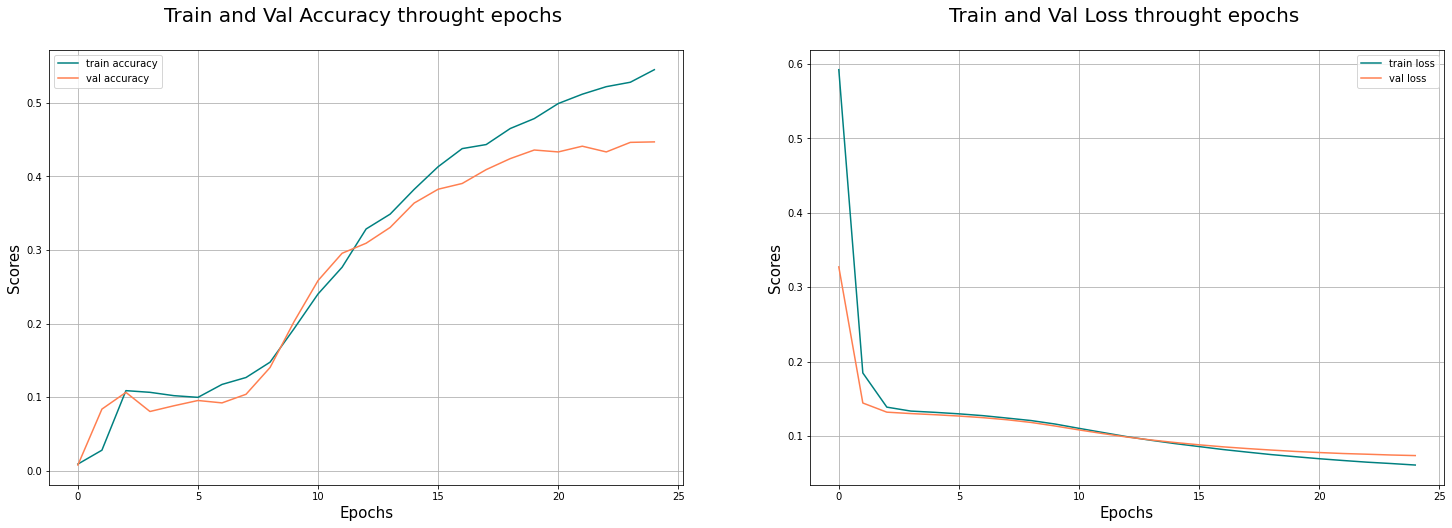

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

color_train = 'teal'
color_val = 'coral'
color_title = 'k'
ax[0].plot(x_scale,train_accuracy,label='train accuracy',color = color_train)
ax[0].plot(x_scale,val_accuracy,label='val accuracy',color = color_val)

ax[0].grid()
ax[0].set_xlabel('Epochs',color = color_title,fontdict={'fontsize': 15})
ax[0].set_ylabel('Scores',color = color_title,fontdict={'fontsize': 15})
ax[0].legend()
ax[0].set_title('Train and Val Accuracy throught epochs \n',color = color_title,fontdict={'fontsize': 20})

ax[1].plot(x_scale,train_loss,label='train loss',color = color_train)
ax[1].plot(x_scale,val_loss,label='val loss',color = color_val)


ax[1].grid()

ax[1].set_xlabel('Epochs',color = color_title,fontdict={'fontsize': 15})
ax[1].set_ylabel('Scores',color = color_title,fontdict={'fontsize': 15})
ax[1].legend()
ax[1].set_title('Train and Val Loss throught epochs \n',color = color_title,fontdict={'fontsize': 20})





plt.show()

# Visualisation des metrics des différents modèles

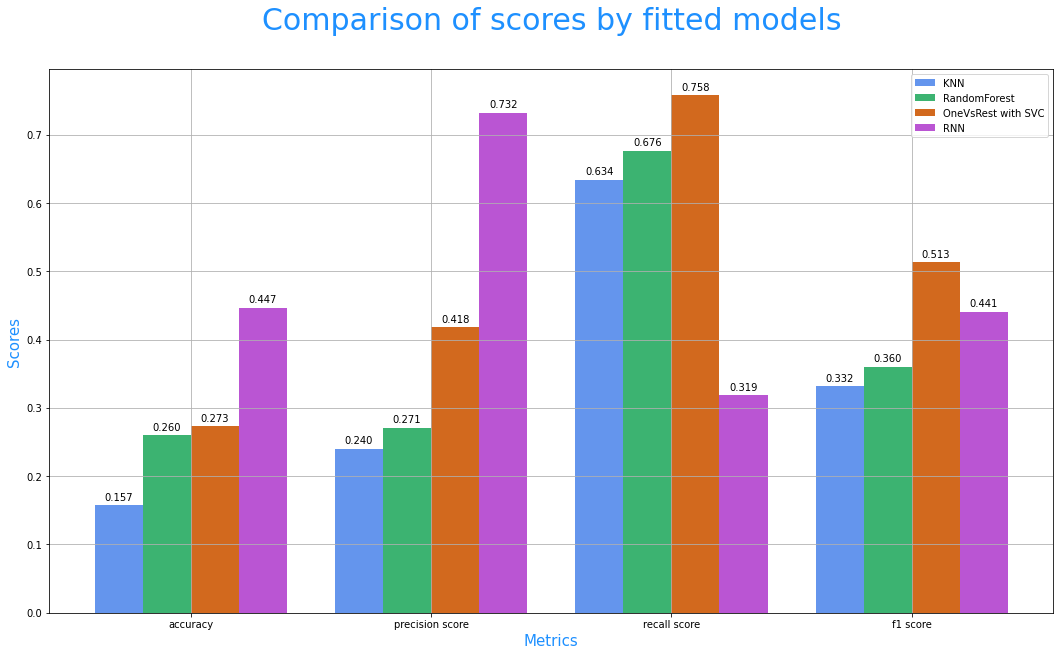

In [24]:
fig = plt.figure(figsize=(18,10))
w1 = 0.2
w2 = 0.2
ax1 = fig.add_subplot(111)

labels = ['accuracy', 'precision score', 'recall score', 'f1 score']
x = np.arange(len(labels)) 


knn_plot = ax1.bar(x-2*w1, list(res_knn.values()), width = 0.2,align='edge',color = 'cornflowerblue',label="KNN")
RFC_plot = ax1.bar(x-w1, list(res_rfc.values()), width = 0.2,align='edge',color = 'mediumseagreen',label="RandomForest")
ovrsvc_plot = ax1.bar(x, list(res_ovr_svc.values()), width = 0.2,align='edge',color = 'chocolate',label="OneVsRest with SVC")
rnn_plot = ax1.bar(x+w1, list(NN_scores.values()), width = 0.2,align='edge',color = 'mediumorchid',label="RNN")



ax1.set_ylabel('Scores',color="dodgerblue",fontdict={'fontsize': 15})
ax1.set_xlabel('Metrics',color="dodgerblue",fontdict={'fontsize': 15})
ax1.set_title('Comparison of scores by fitted models\n',
              color="dodgerblue", 
              fontdict={'fontsize': 30})

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
# ax1.set_xticks(list(res_knn.keys()))


# lines, labels = ax1.get_legend_handles_labels()

ax1.bar_label(knn_plot, padding=3,fmt='%.3f')
ax1.bar_label(RFC_plot, padding=3,fmt='%.3f')
ax1.bar_label(ovrsvc_plot, padding=3,fmt='%.3f')
ax1.bar_label(rnn_plot, padding=3,fmt='%.3f')
# plt.xticks(range(len(res_knn)), list(res_knn.keys()))

plt.grid()
plt.show()

In [25]:
import pickle
filename='model.pkl'
pickle.dump(OvR_SVC, open(filename, 'wb'))